In [1]:
!pip install timm==0.3.2
!pip install torch==1.8.1 torchvision==0.9.1 torchaudio===0.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 244 kB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 804.1 MB 2.5 kB/s 
     |████████████████████████████████| 17.4 MB 28.7 MB/s 
     |████████████████████████████████| 1.9 MB 46.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.1+cu113
    Uninstalling torchaudio-0.12.1+cu113:
      Successfully uninstalled torchaudio-0.12.1+cu113
ERROR: pip's depen

In [2]:
import torch
print(torch.__version__)

import torchvision
print(torchvision.__version__)

import timm
print(timm.__version__)

1.8.1+cu102
0.9.1+cu102
0.3.2


In [3]:
# Data source
from google.colab import drive

# Importing the dataset (stored in Google Drive)
drive.mount("/content/drive", force_remount=True)

!ls "/content/drive/MyDrive/PROJ518/Cotton Dataset/data"
data_dir = "/content/drive/MyDrive/PROJ518/Cotton Dataset/data"

Mounted at /content/drive
test  train  val


In [ ]:
# # NOTE: Mounted coffee-beans dataset (in Paperspace)
# !ls /datasets/coffee-beans

# # Unzip dataset
# !unzip "/datasets/coffee-beans/beans-data-20220903T002815Z-001.zip"

# !ls

# !zip -r convit.zip /notebooks/convit/

In [ ]:
!rm -rf /content/convit/
!git clone https://github.com/GoelBiju/convit.git

Cloning into 'convit'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 64 (delta 30), reused 48 (delta 17), pack-reused 0
Unpacking objects: 100% (64/64), done.


1885
mean and std: 
 tensor([0.4871, 0.5598, 0.3781]) tensor([0.1980, 0.1862, 0.1908])


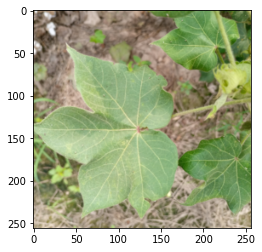

In [ ]:
# Calculate the mean and standard deviation of dataset

# python code to load the image dataset

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.image
import matplotlib.pyplot as plt


# im = matplotlib.image.imread("/storage/image.png")

# matplotlib.pyplot.imshow(im)
# matplotlib.pyplot.show()


# Training: 300 (each class) * 4
# Testing: 100 (each class) * 4
data_path = "/content/drive/MyDrive/PROJ518/Cotton Dataset/combined"

transform_img = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
])

image_data = torchvision.datasets.ImageFolder(
  root=data_path, transform=transform_img
)

image_data_loader = DataLoader(
  image_data, 
  batch_size=len(image_data), 
  shuffle=False, 
  num_workers=0
)

print(len(image_data))


images, labels = next(iter(image_data_loader))

def display_image(images):
    images_np = images.numpy()
    img_plt = images_np.transpose(0, 2, 3, 1)
    # display 5th image from dataset
    plt.imshow(img_plt[4])

display_image(images)


# def mean_std(loader):
#     images, lebels = next(iter(loader))
#     # shape of images = [b,c,w,h]
#     mean, std = images.mean([0,2,3]), images.std([0,2,3])
#     return mean, std

# mean, std = mean_std(image_data_loader)
# print("mean and std: \n", mean, std)

# tensor([0.4871, 0.5598, 0.3781]) tensor([0.1980, 0.1862, 0.1908])

def get_mean_and_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in dataloader:
        # Mean over batch, height and width, but not over the channels
        channels_sum += torch.mean(data, dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
    
    mean = channels_sum / num_batches

    # std = sqrt(E[X^2] - (E[X])^2)
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

mean, std = get_mean_and_std(image_data_loader)
print("mean and std: \n", mean, std)

#  tensor([0.4871, 0.5598, 0.3781]) tensor([0.1980, 0.1862, 0.1908])

# mean of dataset is: tensor([0.4843, 0.5642, 0.3729])
# std of dataset is: tensor([0.1966, 0.1852, 0.1913])

In [ ]:
!python -m torch.distributed.launch --use_env /content/convit/main.py --num_workers 10 --epochs 25 --mixup 0.8 --model convit_base --drop 0.7 --batch-size 32 --output_dir /content/drive/MyDrive/PROJ518/models/transformer  --data-set Binary --data-path /content/drive/MyDrive/PROJ518/Cotton\ Dataset/data

In [ ]:
# python code to load the image dataset

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.image
import matplotlib.pyplot as plt


# im = matplotlib.image.imread("/storage/image.png")

# matplotlib.pyplot.imshow(im)
# matplotlib.pyplot.show()


data_path = "/content/drive/MyDrive/PROJ518/Cotton Dataset/data/test"

transform_img = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
])

image_data = torchvision.datasets.ImageFolder(
  root=data_path, transform=transform_img
)

image_data_loader = DataLoader(
  image_data, 
  batch_size=len(image_data), 
  shuffle=False, 
  num_workers=0
)

print(len(image_data))


images, labels = next(iter(image_data_loader))

def display_image(images):
    images_np = images.numpy()
    img_plt = images_np.transpose(0, 2, 3, 1)
    # display 5th image from dataset
    plt.imshow(img_plt[4])

display_image(images)